# Image generator

This notebook is used to build the images, charts and graphs in the presentation.

In [3]:
import numpy as np
import skgstat as skg
skg.plotting.backend('plotly')
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

## Overview 

First the Geostatistical software image

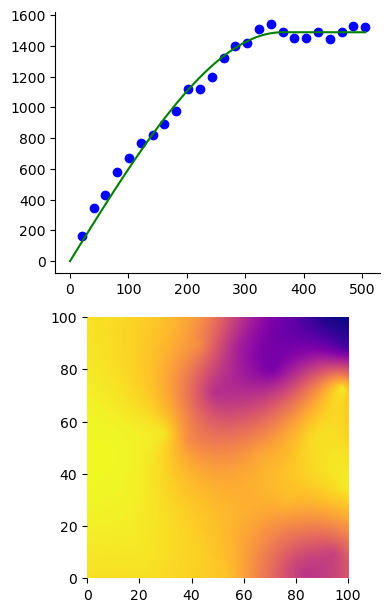

In [4]:
# get the pancake data
coords, vals = skg.data.pancake(N=500).get('sample')
vario = skg.Variogram(coords, vals, normalize=False, maxlag=0.75, n_lags=25)

x = np.linspace(0, vario.bins[-1], 100)
y = vario.fitted_model(x)

krige = vario.to_gs_krige()
field, ss = krige.structured((range(100), range(100)), return_var=True)


fig, axes = plt.subplots(2, 1, figsize=(4, 6.2))
axes[0].plot(vario.bins, vario.experimental, 'bo')
axes[0].plot(x, y, '-g')
axes[1].imshow(field, origin='lower', extent=(0, 100, 0, 100), cmap='plasma')

# remove all spines and axes
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
plt.tight_layout()
#fig.savefig('public/img/geostatistical_software.png')

Then, an image illustrating the uncertainty package

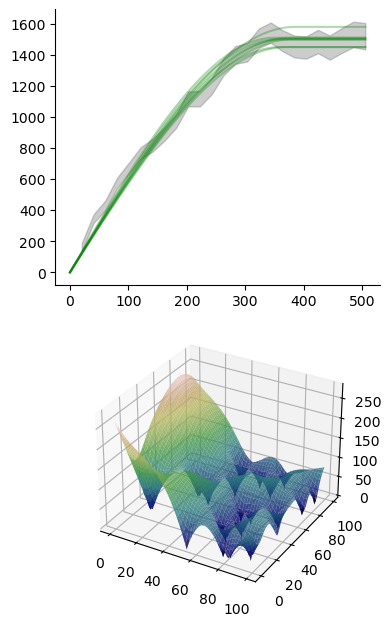

In [6]:
# Make up a random uncertainty band of about 150 units
np.random.seed(42)
lb = vario.experimental - np.random.normal([i *2.5 + 25 for i in range(len(vario.experimental))], scale=0.5)
np.random.seed(44)
ub = vario.experimental + np.random.normal([i *2.5 + 25 for i in range(len(vario.experimental))], scale=0.5)

fig = plt.figure(figsize=(4, 6.2))
ax1 = fig.add_subplot(211)
ax2  = fig.add_subplot(212, projection='3d')

#fig, axes = plt.subplots(2, 1, figsize=(4, 8))
ax1.fill_between(vario.bins, lb, ub, color='gray', alpha=0.4)

# put a few models through the area
x = np.linspace(0, vario.bins[-1], 100)
for r in np.arange(350, 390, 5):
    np.random.seed(r)
    y = skg.models.spherical(x, r, np.random.choice([1450,1490, 1500, 1510, 1550, 1580], 1))
    ax1.plot(x, y, '-g', alpha=0.3)

# create a meshgrid for the field
X, Y = np.meshgrid(range(100), range(100))
ax2.plot_surface(X, Y, ss, cmap='gist_earth', alpha=0.8)

# remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# remove the spines from the 3d plot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# save
plt.tight_layout()
#fig.savefig('public/img/geostatistical_uncertainty.png')

## Motivation

In [9]:
# fit a gaussian, spheircal and exponential model
vario.model = 'gaussian'
y_gaus = vario.fitted_model(x)
p_gaus = vario.parameters

vario.model = 'exponential'
y_exp = vario.fitted_model(x)
p_exp = vario.parameters

vario.model = 'spherical'
y_sph = vario.fitted_model(x)
p_sph = vario.parameters

# print the vario bins and experimental values to a json file
import json
with open('src/slides/data/vario.json', 'w') as f:
    json.dump({
        'bins': vario.bins.round(1).tolist(),
        'experimental': vario.experimental.round(1).tolist(),
        'modelX': x.round(1).tolist(),
        'modelGauss': y_gaus.round(1).tolist(),
        'modelExp': y_exp.round(1).tolist(),
        'modelSph': y_sph.round(1).tolist(),
        'paramsGauss': p_gaus,
        'paramsExp': p_exp,
        'paramsSph': p_sph,
    }, f, indent=4)